The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

This analysis have several section:
1. Analysis overview
2. Data overview
3. Pre-Processing data
4. Statistical & Data visualization

### Analysis Overview

**This analysis will answer some questions**
1. How is learning situation of students in this pandemic era
2. How is online class situations of students in this pandemic era
3. How is students learning behavior on each level of school

### Data Overview

In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR)

In [1]:
import pandas as pd # data processing
import numpy as np # operasi matematika

In [2]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [3]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [4]:
x, y = df.shape
print(f"{x} row & {y} kolom")

1182 row & 19 kolom


#### We can look deeper through into data's information.

#### To answer these questions, this analysis focused on several variable

*Independent Variable:*
1. Level of school

*Dependent Variable:*
1. Time spent on online class
2. Time spent on self study
3. Time spent on sleep
4. Time spent on social media
5. Rating on online class
6. Student self study vs social media orientation
7. Is student has enough time for study?
8. Is student has normal time sleep?
9. Is student spent more time for social media + tv than self study + online class

*Explanation of each variable:* (Independent variable) causes a charge in (Dependent variable).

###### In this visualization: 
- Independent variables are as an input (n x-axis).
- Dependent variables are as an output (y-axis).

So we can compare different learning situation of each level of school's students.

Example:
Independent variable (x-axis)
1. Subject's level of sschool (Elementary, Junior High, Senior High, College)

Dependent variable (y-axis)
1. Time spent on self study (each level of school probably has different value and we can compared to each level of school, which level of school has highest time spent on self study), etc

#### This research will shows you:

1. Statistical data about New Delhi's student in this pandemic era
2. Data visualization of the data
3. Finding some ideas and insight based on statistical relationship that appears in data visualization or statistical data to answer the questions
4. Percentage's of good and bad student at the end, to gives the reader chances to has his own conclusion or hisown insight

### Data pre-processing:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

There are no missing values

#### Classified students by age

There is no information about education level, so we will create a new column of education level information and categorize it by age.
- 0-12 (Elementary School)
- 13-15 (Junior High School)
- 16-18 (Senior High School)
- 18 > (College) 

#### Changes rating on online class which is describe variables to numerical variables

- Excellent is equal to 5
- Good is equal to 4
- Average is equal to 3
- Poor is equal to 2
- Very poor is equal to 1

#### Create new column, is student spent more time on Social Media than Self Study?

This column is based on spent time on social media and spent time on slef study column, if students has more time on social media, then insert "YES"

#### Create new column, is student has normal time of sleep?

What is normal time sleep in this analysis? The American Academy of Sleep Medicine has recommended that children aged 6-12 years should regularly sleep 9-12 hours per 24 hours and teenagers ages 13-18 years should sleep 8-10 hours per 24 hours.

If the subject's time sleep didn't classified into normal time sleep, then insert value "YES", else, insert value "NO"

In [6]:
df["Age of Subject"].describe()

count    1182.000000
mean       20.165821
std         5.516467
min         7.000000
25%        17.000000
50%        20.000000
75%        21.000000
max        59.000000
Name: Age of Subject, dtype: float64

In [7]:
conditions_school_level = [
    (df["Age of Subject"] <= 12),
    (df["Age of Subject"] >= 13) & (df["Age of Subject"] <= 15),
    (df["Age of Subject"] >= 16) & (df["Age of Subject"] <= 18),
    (df["Age of Subject"] >= 19)
]

values = ["Elementary", "Junior High", "Senior High", "College"]

df["Subject's Level of School"] = np.select(conditions_school_level, values)

In [8]:
df["Rating of Online Class experience"].describe()

count          1158
unique            5
top       Very poor
freq            413
Name: Rating of Online Class experience, dtype: object

In [9]:
conditions_rat_online_class = [
    df["Rating of Online Class experience"] == "Excellent",
    df["Rating of Online Class experience"] == "Good",
    df["Rating of Online Class experience"] == "Average",
    df["Rating of Online Class experience"] == "Poor",
    df["Rating of Online Class experience"] == "Very poor",
]

values = [5,4,3,2,1]

df["Rating of Online Class"] = np.select(conditions_rat_online_class, values)

In [10]:
condition_time_spent = [
    df["Time spent on social media"] > df["Time spent on self study"]
]

value = ["YES"]

df["Is student spent more time on Social Media than Self Study?"] = np.select(condition_time_spent, value, default = "NO")

In [11]:
condition_sleep = [
    (df["Subject's Level of School"] == "Elementary") & (df["Time spent on sleep"] >= 9) & (df["Time spent on sleep"] <= 12),
    (df["Subject's Level of School"] == "Junior High") & (df["Time spent on sleep"] >= 8) & (df["Time spent on sleep"] <= 10),
    (df["Subject's Level of School"] == "Senior High") & (df["Time spent on sleep"] >= 8) & (df["Time spent on sleep"] <= 10),
    (df["Subject's Level of School"] == "College") & (df["Time spent on sleep"] >= 7) & (df["Time spent on sleep"] <= 10)
]

value = ["YES","YES","YES","YES"]

df["Is student has normal time sleep?"] = np.select(condition_sleep, value, default = "NO")

In [12]:
df["Total time of study"] = df["Time spent on Online Class"] + df["Time spent on self study"]

In [13]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,...,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Subject's Level of School,Rating of Online Class,Is student spent more time on Social Media than Self Study?,Is student has normal time sleep?,Total time of study
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,...,NO,Cooking,YES,YES,School/college,College,4,NO,YES,6.0
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,...,NO,Scrolling through social media,YES,NO,Roaming around freely,College,5,YES,YES,0.0
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,...,NO,Listening to music,NO,YES,Travelling,College,1,NO,NO,10.0
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,...,NO,Watching web series,NO,NO,"Friends , relatives",College,1,YES,NO,5.0
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,...,NO,Social Media,NO,NO,Travelling,College,4,NO,YES,6.0


#### Basic Statistical Analysis

In [14]:
df.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Rating of Online Class,Total time of study
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936,2.575296,6.120431
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698,1.397590,3.173819
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000,1.000000,4.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000,3.000000,6.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000,4.000000,8.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000,5.000000,22.000000


In [15]:
df_elementary = df[df["Subject's Level of School"] == "Elementary"]
df_junior = df[df["Subject's Level of School"] == "Junior High"]
df_senior = df[df["Subject's Level of School"] == "Senior High"]
df_college = df[df["Subject's Level of School"] == "College"]

In [16]:
df_elementary.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Rating of Online Class,Total time of study
count,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000
mean,11.250000,3.556818,2.175000,0.797727,8.50000,1.488636,2.931818,4.090909,5.731818
std,1.296238,1.808301,0.994666,0.572830,1.81082,1.420320,0.925045,0.910359,2.326668
min,7.000000,0.000000,1.000000,0.000000,5.00000,0.000000,1.000000,1.000000,2.000000
25%,11.000000,2.000000,1.875000,0.375000,7.00000,1.000000,2.000000,3.750000,4.000000
50%,12.000000,4.000000,2.000000,1.000000,8.00000,1.000000,3.000000,4.000000,6.000000
75%,12.000000,5.000000,3.000000,1.000000,9.00000,2.000000,4.000000,5.000000,7.000000
max,12.000000,6.000000,5.000000,2.000000,15.00000,7.000000,4.000000,5.000000,11.000000


In [17]:
df_junior.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Rating of Online Class,Total time of study
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,13.917293,4.272556,2.848120,0.872932,8.092481,1.628195,2.894737,3.593985,7.120677
std,0.798152,1.732996,1.815698,0.744360,1.815240,1.340134,0.947590,1.161488,2.739602
min,13.000000,0.500000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,2.000000
25%,13.000000,3.000000,2.000000,0.000000,7.000000,1.000000,2.000000,3.000000,5.000000
50%,14.000000,4.000000,2.000000,1.000000,8.000000,1.000000,3.000000,4.000000,7.000000
75%,15.000000,5.000000,4.000000,1.000000,9.000000,2.000000,3.000000,4.000000,8.500000
max,15.000000,9.000000,11.000000,3.000000,13.000000,10.000000,7.000000,5.000000,19.000000


In [18]:
df_senior.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Rating of Online Class,Total time of study
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,16.994764,4.091885,2.806283,0.834293,7.764398,2.107853,2.874346,2.586387,6.898168
std,0.836644,2.331071,1.957889,0.771355,1.604103,1.679815,0.861407,1.330462,3.324053
min,16.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.750000,0.000000,7.000000,1.000000,2.000000,1.000000,5.000000
50%,17.000000,4.000000,2.000000,1.000000,8.000000,2.000000,3.000000,3.000000,7.000000
75%,18.000000,6.000000,4.000000,1.000000,9.000000,3.000000,3.000000,4.000000,9.000000
max,18.000000,9.000000,12.000000,3.000000,12.000000,9.000000,7.000000,5.000000,18.000000


In [19]:
df_college.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Rating of Online Class,Total time of study
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,22.412776,2.809029,2.986486,0.730528,7.826167,2.594103,2.931204,2.324324,5.795516
std,5.073786,1.987840,2.265944,0.715364,1.564769,1.811378,0.795241,1.343005,3.182116
min,19.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,1.000000,2.000000,0.000000,7.000000,1.000000,2.000000,1.000000,4.000000
50%,21.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000,3.000000,6.000000
75%,22.000000,4.000000,4.000000,1.000000,8.000000,3.000000,3.000000,3.000000,8.000000
max,59.000000,10.000000,18.000000,5.000000,14.000000,10.000000,8.000000,5.000000,22.000000


In [20]:
df.describe(include = "O")

,ID,Region of residence,Rating of Online Class experience,Medium for online class,Prefered social media platform,Time spent on TV,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Subject's Level of School,Is student spent more time on Social Media than Self Study?,Is student has normal time sleep?
count,1182,1182,1158,1131,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182
unique,1182,2,5,5,16,25,3,2,86,2,2,51,4,2,2
top,R402,Delhi-NCR,Very poor,Laptop/Desktop,Instagram,0,Remain Constant,NO,Listening to music,NO,YES,School/college,College,NO,YES
freq,1,721,413,545,352,441,535,1021,276,608,831,379,814,803,791


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Time spent on Online Class

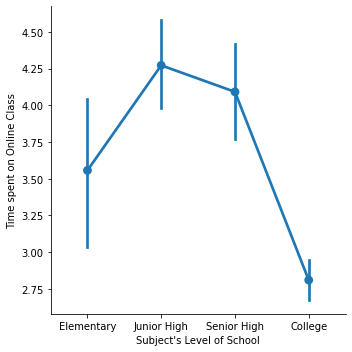

In [22]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on Online Class",
           kind = "point",
           order = ["Elementary","Junior High","Senior High","College"],
           data = df)
plt.show()

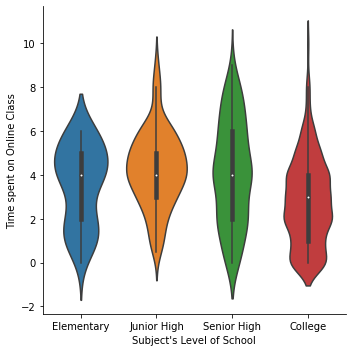

In [23]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on Online Class",
           kind = "violin",
           order = ["Elementary","Junior High","Senior High","College"],
           data = df)
plt.show()

#### Analysis on Time on spent on Online Class

Elementary School 
- mean: 3.5 hour 
- std: 1.8 hour

Junior High School
- mean: 4.2 hour
- std: 1.7 hour

Senior High School
- mean: 4 hour
- std: 2.3 hour

College
- mean: 2.8 hour
- std: 1.9 hour

The relationship between level of school and time spent on online class is ambigous. College, which supposed to be the higher level of school, but it has lowesttime spent of online class, even lower than elementary school.

Each level of school has std deviation 1.8 - 2.3 hours, std deviation means value trend thas closed to the mean value.

In violin bars we can also see that the violin has long and thin shape, that's impled that school didn't has strong trend value of online learning. Student has very various amount of the time on online class.

It means each level of school didn't hace standard rule about learning hour to their students, each student has varoius time spent on onlone learning.

### Rating on Online Class

In [24]:
df["Rating of Online Class experience"].value_counts()

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
Name: Rating of Online Class experience, dtype: int64

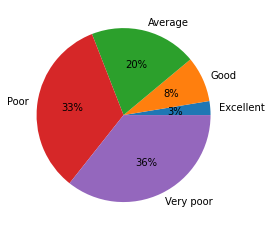

In [25]:
labels = ["Excellent", "Good", "Average", "Poor", "Very poor"]
data = [30, 98, 230, 387, 413]

plt.pie(data, labels = labels,
        autopct = "%.0f%%"
       )
plt.show()

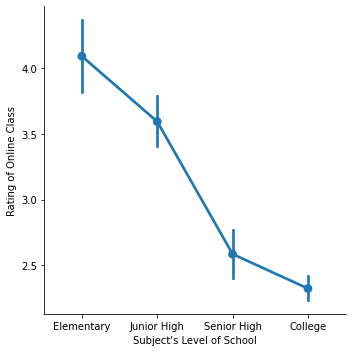

In [26]:
sns.catplot(x = "Subject's Level of School",
           y = "Rating of Online Class",
           kind = "point",
           order = ["Elementary","Junior High","Senior High","College"],
           data = df)
plt.show()

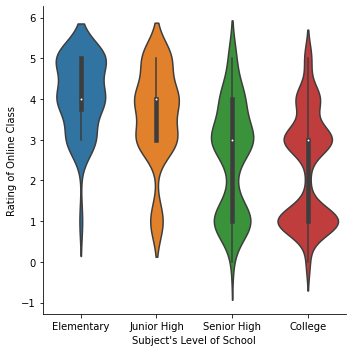

In [27]:
sns.catplot(x = "Subject's Level of School",
           y = "Rating of Online Class",
           kind = "violin",
           order = ["Elementary","Junior High","Senior High","College"],
           data = df)
plt.show()

#### Analysis on Rating of Online Class experience

Elementary School
- Mean: 4.09
- Modus: 5/5 (highest rating on Online Class experience
- std: 0.91

Junior High School
- Mean: 3.59
- Modus: 4/5 (good rating)
- std: 1.16

Senior High School
- Mean: 2.58
- Modus: 3/5 (average rating)
- std: 1.33

College
- Mean: 2.32
- Modus: 1/5 (bad rating on Online Class experience)
- std: 1.33

College students has lowest time learning on Online Class, they also even has lowest rating of online class experience. It makes **college student has worst online class quality, based on time spent of online class and rating of online class.**

**Elementary students has best online class quality based on time spent of online class and rating of online class.**

### Time spent on Self Study

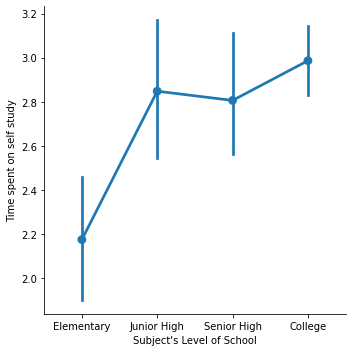

In [28]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on self study",
           kind = "point",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

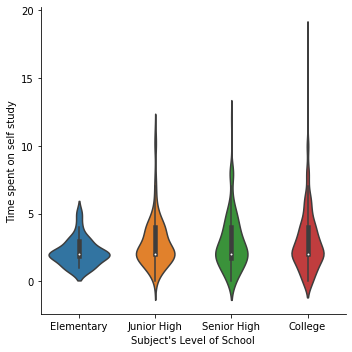

In [29]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on self study",
           kind = "violin",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

Eventhough college's student has worst online class experience, but they preffered and focused on self study rather than online class

### Total time of study

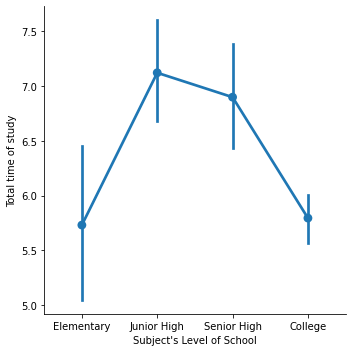

In [30]:
sns.catplot(x = "Subject's Level of School",
           y = "Total time of study",
           kind = "point",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

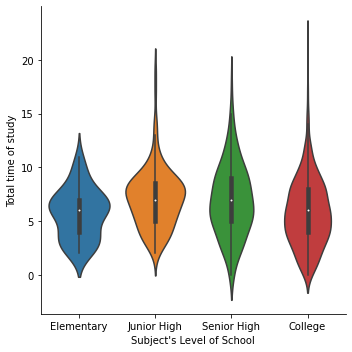

In [31]:
sns.catplot(x = "Subject's Level of School",
           y = "Total time of study",
           kind = "violin",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

Compared to normal time study as school before pandemic. As predicted, students have low trend on time spent on study but several student have very high time spent on study

### Time spent on sleep

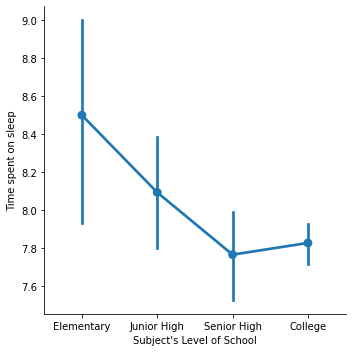

In [32]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on sleep",
           kind = "point",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

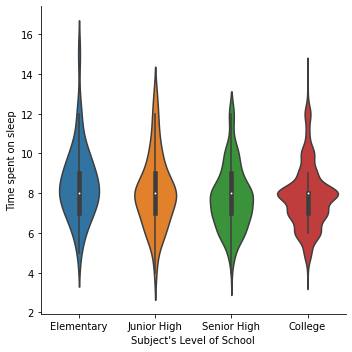

In [33]:
sns.catplot(x = "Subject's Level of School",
           y = "Time spent on sleep",
           kind = "violin",
            order = ["Elementary","Junior High","Senior High","College"],
            data = df
           )
plt.show()

If we looked at mean Time spent on sleep, ***All students have normal amount of time of sleep.***

But if we looked at min, max, bar errors and distribution of the data a small number of student have a trend of having higher time spent on sleep (bigger than 8 hours) and less than 4 hours.

### Is student has normal time amount of sleep?

In [34]:
df_elementary["Is student has normal time sleep?"].value_counts(normalize= True)

NO     0.590909
YES    0.409091
Name: Is student has normal time sleep?, dtype: float64

In [35]:
df_junior["Is student has normal time sleep?"].value_counts(normalize= True)

YES    0.526316
NO     0.473684
Name: Is student has normal time sleep?, dtype: float64

In [36]:
df_senior["Is student has normal time sleep?"].value_counts(normalize= True)

NO     0.518325
YES    0.481675
Name: Is student has normal time sleep?, dtype: float64

In [37]:
df_college["Is student has normal time sleep?"].value_counts(normalize= True)

YES    0.750614
NO     0.249386
Name: Is student has normal time sleep?, dtype: float64

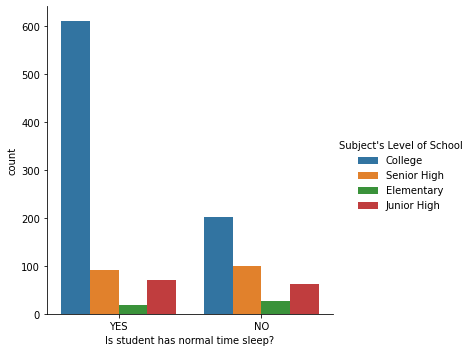

In [38]:
sns.catplot(x = "Is student has normal time sleep?",
           hue = "Subject's Level of School",
           kind = "count",
           data = df)
plt.show()

If we compared time spent on sleep on each level of school, **60% of elementary school students have problem with their sleeping time, that's only 40% of elementary students have normal time of sleep.**

It's kind of unexpected result, the college's student have better percentage of having normal time of sleep, with 75% of student having normal time amount of sleep

### Is student spent more time on Social Media than Self Study?

In [39]:
df_elementary["Is student spent more time on Social Media than Self Study?"].value_counts(normalize = True)

NO     0.795455
YES    0.204545
Name: Is student spent more time on Social Media than Self Study?, dtype: float64

In [40]:
df_junior["Is student spent more time on Social Media than Self Study?"].value_counts(normalize = True)

NO     0.857143
YES    0.142857
Name: Is student spent more time on Social Media than Self Study?, dtype: float64

In [41]:
df_senior["Is student spent more time on Social Media than Self Study?"].value_counts(normalize = True)

NO     0.701571
YES    0.298429
Name: Is student spent more time on Social Media than Self Study?, dtype: float64

In [42]:
df_college["Is student spent more time on Social Media than Self Study?"].value_counts(normalize = True)

NO     0.638821
YES    0.361179
Name: Is student spent more time on Social Media than Self Study?, dtype: float64

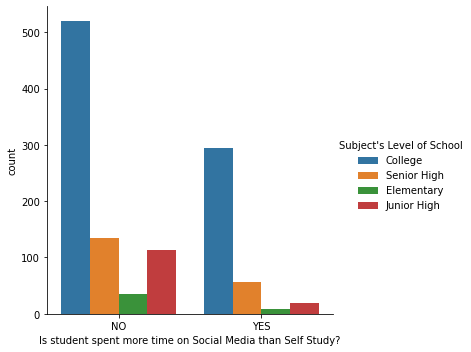

In [43]:
sns.catplot(x = "Is student spent more time on Social Media than Self Study?",
           hue = "Subject's Level of School",
           kind = "count",
           data = df)
plt.show()

Based on percentage and visualization. **It seems students on each level of school has strong trend on prefferes to sepent their time on slef study rather than social media, which means this is very good trend for student.**

### Health issues during Lockdown

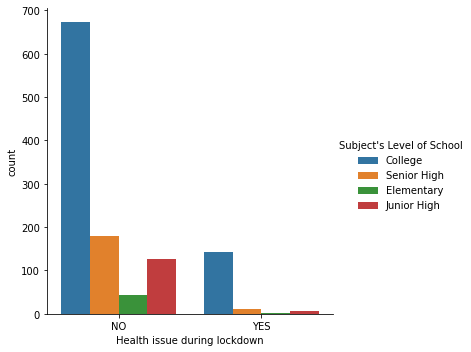

In [44]:
sns.catplot(x = "Health issue during lockdown",
           hue = "Subject's Level of School",
           kind = "count",
           data = df)
plt.show()

Based on percentage and visualization, **students on each level of school has strong trend on having no health issues.**

### Most popular social media platform in covid pandemic era based on students

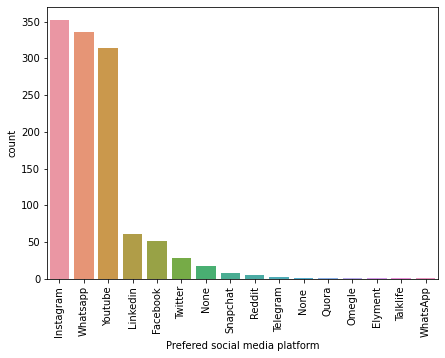

In [45]:
plt.figure(figsize = (7, 5))
sns.countplot(x = df["Prefered social media platform"],
             order = df["Prefered social media platform"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [46]:
df["Medium for online class"].value_counts()

Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Smartphone or Laptop/Desktop      5
Any Gadget                        5
Name: Medium for online class, dtype: int64

#### Reference

- Analysis by Gusanwa
- https://www.kaggle.com/code/muhammadgusanwaakbar/covid-19-school-closures-and-learning-situation
- https://www.youtube.com/watch?v=hPCrkvRabJs&list=WL&index=5&t=1083s&ab_channel=GusanwaTheAnalyst
